<a href="https://colab.research.google.com/github/batio3/Data_visualization_learning_project/blob/main/Data_visualization_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [69]:
#Датасет количества смертельных аварий на автомобилях Тесла

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,254,2022,8/16/2022,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,https://www.tag24.de/nachrichten/unfall/tesla...,NaN,NaN,NaN,NaN,NaN
1,253,2022,8/15/2022,USA,CA,Tesla veers into oncoming traffic,4,1.0,3.0,NaN,...,4.0,NaN,NaN,NaN,https://www.ksbw.com/article/hollister-crash-...,NaN,NaN,NaN,NaN,NaN
2,252,2022,8/14/2022,Finland,NaN,Unlicensed driver hits pedestrian,1,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN
3,251,2022,8/2/2022,USA,FL,Man in wheelchair hit crossing road,1,NaN,NaN,NaN,...,1.0,3,NaN,NaN,https://www.wfla.com/news/man-in-wheelchair-f...,NaN,NaN,NaN,NaN,NaN
4,250,2022,7/27/2022,USA,ME,Tesla crashes at high speed,1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,https://www.boothbayregister.com/article/sout...,NaN,James T. Penner,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case #                            254 non-null    int64  
 1   Year                              254 non-null    int64  
 2   Date                              254 non-null    object 
 3    Country                          254 non-null    object 
 4    State                            185 non-null    object 
 5    Description                      254 non-null    object 
 6    Deaths                           254 non-null    int64  
 7    Tesla driver                     99 non-null     float64
 8    Tesla occupant                   36 non-null     float64
 9    Other vehicle                    97 non-null     float64
 10   Cyclists/ Peds                   37 non-null     float64
 11   TSLA+cycl / peds                 158 non-null    float64
 12   Model  

In [5]:
#Определим тенденцию количества смертей в дтп на автомобиле Тесла
d_year = df[[' Deaths ']].groupby(df['Year']).sum()
d_year

,Deaths
Year,
2013,3
2014,6
2015,5
2016,16
2017,11
2018,21
2019,50
2020,47
2021,75


Text(0, 0.5, 'Количество погибших')

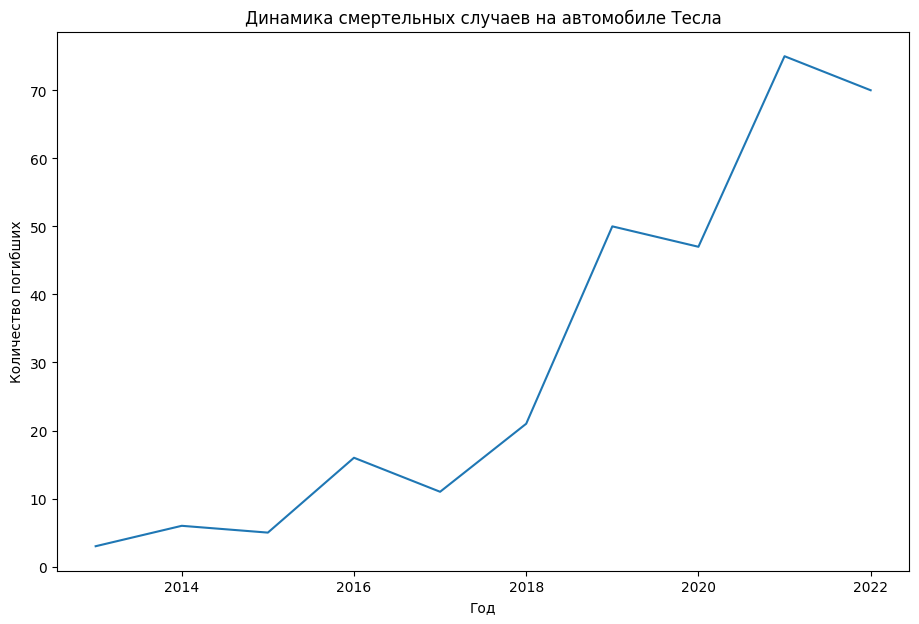

In [6]:
plt.plot(d_year.index, d_year[' Deaths '])
plt.title('Динамика смертельных случаев на автомобиле Тесла')
plt.xlabel('Год')
plt.ylabel('Количество погибших')
#Определенно, рост количество смертельных ДТП связан с увеличением количества автомобилей Тесла на дорогах

In [20]:
d_year_1 = df[[' Deaths ']].groupby(df[' Country ']).sum()
d_year_1.style.background_gradient(cmap='Blues')

,Deaths
Country,
Australia,2
Austria,1
Belgium,2
Canada,8
China,15
Denmark,2
Finland,1
France,3
Germany,15


<Axes: title={'center': 'Количество погибших по странам'}, xlabel='Страна', ylabel='Количество погибших'>

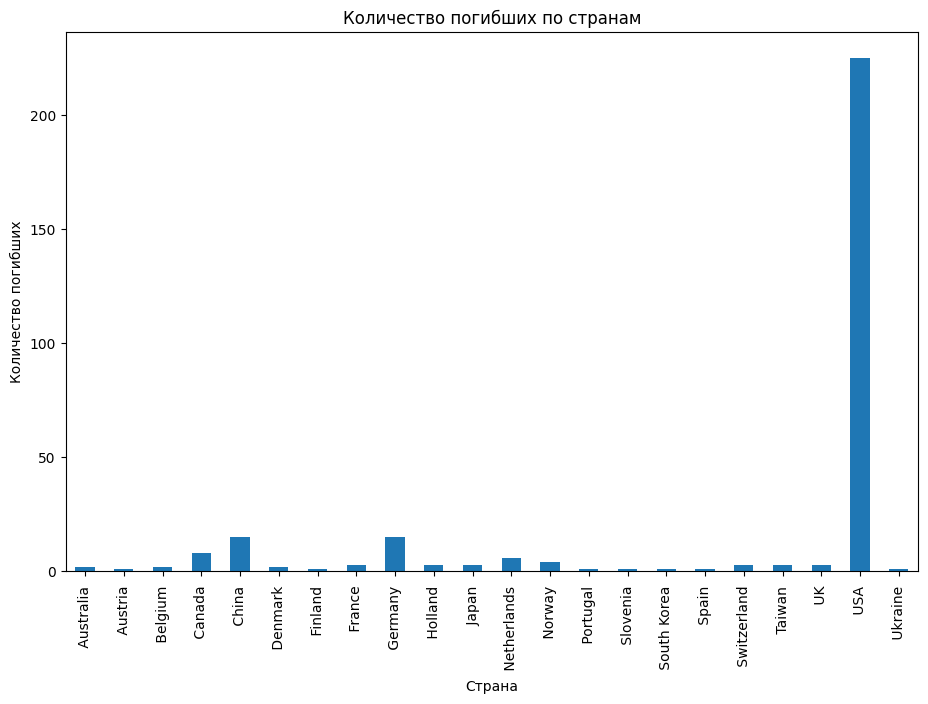

In [8]:
# распределение количества погибших по странам
d_year_1[' Deaths '].plot(kind='bar', 
                          title='Количество погибших по странам',
                          xlabel='Страна',
                          ylabel='Количество погибших')
#наибольшее количество погибших в США, связи с большим количеством электромобилей и развитой инфраструктурой электрокаров

<Axes: title={'center': 'Модели наиболее часто попадающие в смертельные ДТП'}, ylabel=' Model '>

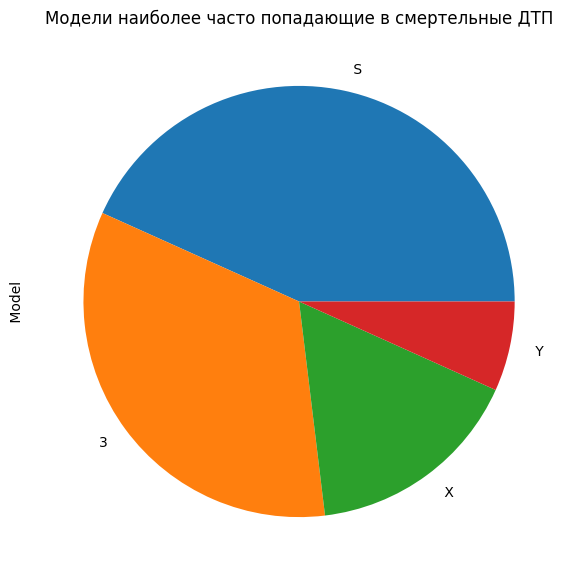

In [9]:
# Модели Тесла, которые наиболее часто попадали в смертельные ДТП
pie_data = df[' Model '].value_counts()
pie_data.plot(kind='pie', title='Модели наиболее часто попадающие в смертельные ДТП')
#несмотря на то, что продажи модели 3 и Y на много больше модели S, наибольшее количество ДТП со смертельным исходом происходит именно на этой модели

In [10]:
# исправим типы данных
df[' Tesla driver '] = df[' Tesla driver '].astype('Int64')
df[' Tesla occupant '] = df[' Tesla occupant '].astype('Int64')



In [11]:
d_year_2 = df[[' Tesla driver ', ' Tesla occupant ']].groupby(df['Year']).sum()
d_year_2

,Tesla driver,Tesla occupant
Year,,
2013,0,0
2014,2,0
2015,4,0
2016,5,2
2017,2,0
2018,8,7
2019,11,6
2020,13,6
2021,28,11


<Axes: title={'center': 'Динамика ДТП с летальным исходом на автомобилях Тесла'}, xlabel='Год', ylabel='Количество погибших.'>

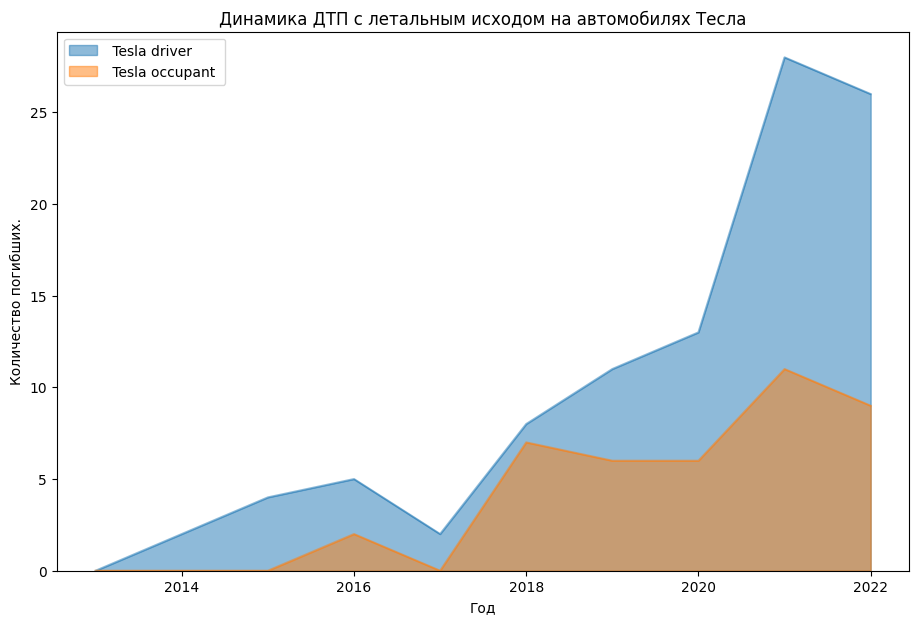

In [12]:
d_year_2.plot(kind='area',
              title='Динамика ДТП с летальным исходом на автомобилях Тесла', 
              xlabel='Год', 
              stacked=False,
              ylabel='Количество погибших.')
#Есть предположение, что при смертельным ДТП, если в салоне находился пассажир, как правило он гибнет вместе с водителем, динамика очень схожа

<Axes: >

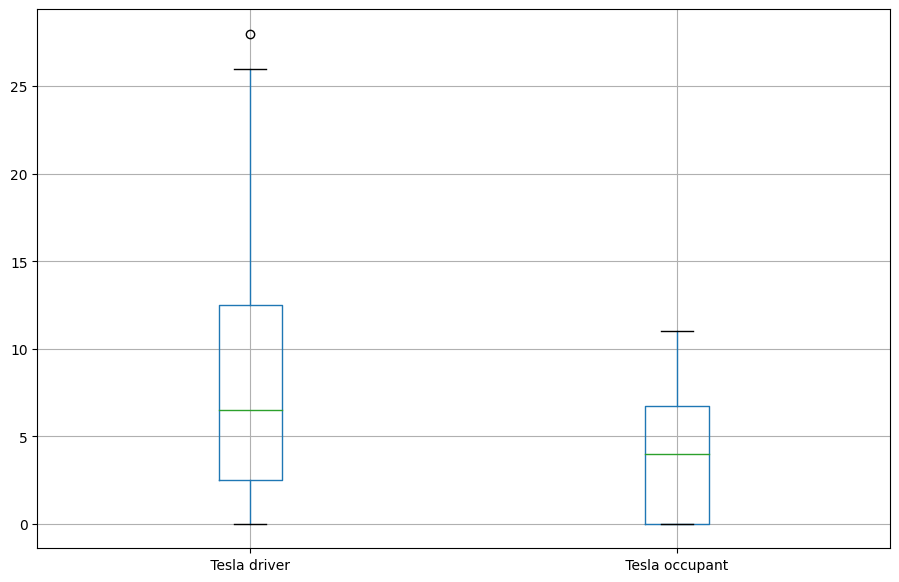

In [126]:
d_year_2.boxplot()
#"Ящик с усами" показывает распределение данных по квартилям, выделяя их выбросы, на данном графике мы видим
#распределение погибших водителей и пассажиров Тесла за всю историю наблюдений

In [72]:
table = pd.pivot_table(df, values=' Deaths ', index=[' Model '],
                       columns=['Year'], aggfunc=np.sum, fill_value=0)
table

Year,2013,2015,2016,2017,2018,2019,2020,2021,2022
Model,,,,,,,,,
S,2,1,6,2,10,17,3,8,5
X,0,0,1,0,5,4,7,0,2
Y,0,0,0,0,0,0,3,2,4
3,0,0,0,0,1,14,14,7,5


<Axes: xlabel='Year', ylabel=' Model '>

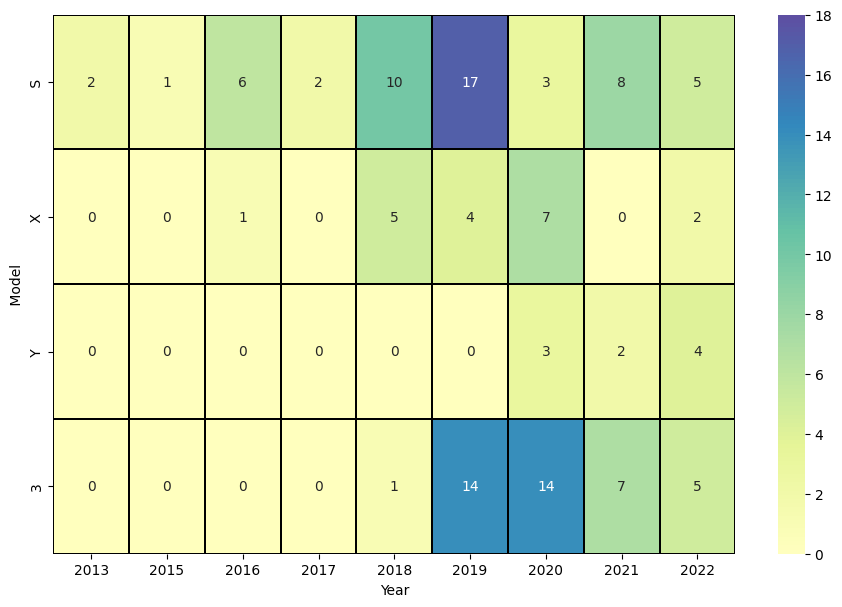

In [122]:
sns.heatmap(table,  annot=True, vmin=0, vmax=18, center=0, cmap="Spectral", linewidths=0.3, linecolor='black')
#В данной тепловой карте, показаны количество смертей для каждой модели автомобиля Тесла по годам, данные могут отличаться от суммы всех
#погибших, т.к. в данных не всегда известен автомобиль, попавший в ДТП
